In [ ]:
# 1. Explore the descriptive statistics on the given dataset

from sklearn.datasets import load_iris
import pandas as pd
from scipy.stats import skew, kurtosis

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Central Tendency
print("CENTRAL TENDENCY:")
print("Mean:\n", df.mean(), "\n")
print("Median:\n", df.median(), "\n")

# Spread
print("SPREAD:")
print("Standard Deviation:\n", df.std(), "\n")
print("Variance:\n", df.var(), "\n")
print("Range:\n", df.max() - df.min(), "\n")

# Distribution Shape
print("DISTRIBUTION:")
print("Skewness:\n", df.apply(skew), "\n")
print("Kurtosis:\n", df.apply(kurtosis), "\n")


CENTRAL TENDENCY:
Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64 

Median:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64 

SPREAD:
Standard Deviation:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64 

Variance:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64 

Range:
 sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64 

DISTRIBUTION:
Skewness:
 sepal length (cm)    0.311753
sepal width (cm)     0.315767
petal length (cm)   -0.272128
petal width (cm)    -0.101934
dtype: float64 

Kurtosis:
 sepal length (cm)   -0.573568
sepal width (cm)     0.180976
petal length (cm)   -1.395536
petal 

In [2]:
# EXP 2: DATA CLEANING

import pandas as pd
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

print(f"\nShape before cleaning: {df.shape}")
print(df.head(1))

# 1. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 2. Drop columns with too many missing values (optional)
df = df.drop(['deck'], axis=1)  # 'deck' has lots of nulls

# 3. Fill missing values (example: age and embarked)
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 4. Check and remove duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicate_count}")
df = df.drop_duplicates()

# 5. Check data types
print("\nData types:")
print(df.dtypes)

# 6. Final cleaned data preview
print("\nCleaned Data Preview:")
print(df.head(1))
print(f"\nFinal shape: {df.shape}")



Shape before cleaning: (891, 15)
   survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  

Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Duplicate rows found: 116

Data types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

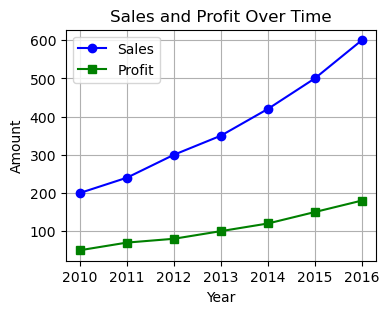

<Figure size 400x300 with 0 Axes>

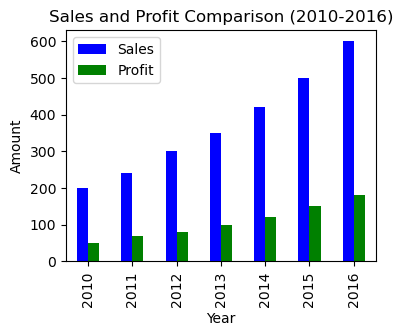

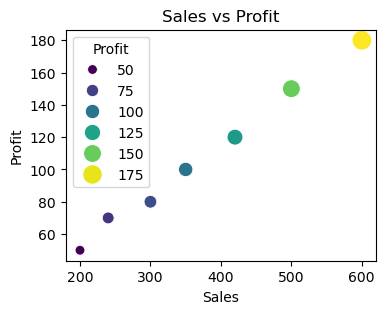

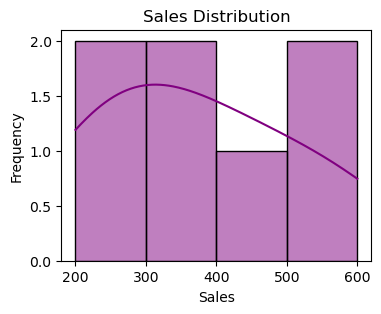

In [3]:
# EXP 3: DATA VISUALIZATION 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016],
        'Sales': [200, 240, 300, 350, 420, 500, 600],
        'Profit': [50, 70, 80, 100, 120, 150, 180]}
df = pd.DataFrame(data)

plt.figure(figsize=(4,3))
plt.plot(df['Year'], df['Sales'], marker='o', color='b', label='Sales')
plt.plot(df['Year'], df['Profit'], marker='s', color='g', label='Profit')
plt.title('Sales and Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(4,3))
df.plot(kind='bar', x='Year', y=['Sales', 'Profit'], color=['blue', 'green'], figsize=(4,3))
plt.title('Sales and Profit Comparison (2010-2016)')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.show()

plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Profit', palette='viridis', size='Profit', sizes=(50, 200))
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

plt.figure(figsize=(4,3))
sns.histplot(df['Sales'], kde=True, color='purple')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


Logistic Regression Evaluation Metrics:
Accuracy: 1.00
Precision (Weighted): 1.00
Recall (Weighted): 1.00
F1 Score (Weighted): 1.00

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



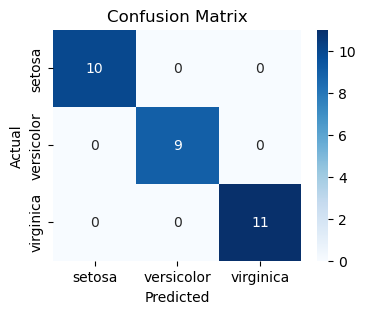

In [4]:
# EXP 4: LOGISTIC REGRESSION AND EXPLORE PERFORMANCE EVALUATION METRICS

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
  )


# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Output results
print("Logistic Regression Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")
print("\nClassification Report:\n", report)

# Confusion Matrix Visualization
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_1808\1205837761.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_imbalanced, palette='pastel')


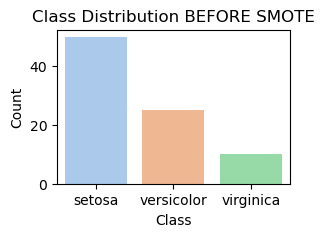

C:\Users\Dell\AppData\Local\Temp\ipykernel_1808\1205837761.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


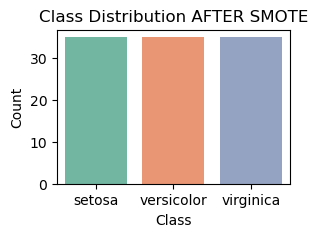

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



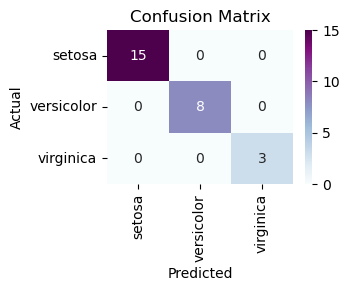

In [9]:
# EXP 5 To generate synthetic data for class imbalance using the SMOTE 


import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Simulate class imbalance
df_imbalanced = pd.concat([
    df[df['target'] == 0],
    df[df['target'] == 1].sample(25, random_state=42),
    df[df['target'] == 2].sample(10, random_state=42)
])

X_imbalanced = df_imbalanced.drop('target', axis=1)
y_imbalanced = df_imbalanced['target']

# Visualize class distribution before SMOTE
plt.figure(figsize=(3, 2))
sns.countplot(x=y_imbalanced, palette='pastel')
plt.title("Class Distribution BEFORE SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.3, random_state=42, stratify=y_imbalanced)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(3, 2))
sns.countplot(x=y_resampled, palette='Set2')
plt.title("Class Distribution AFTER SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

T-Test Results:
T-statistic: 2.499206354920835
P-value: 0.012671296797013709

Confidence Interval for 'Fare':
95% Confidence Interval: (30.81, 38.58)

Correlation between Age and Fare:
Correlation Coefficient: 0.10


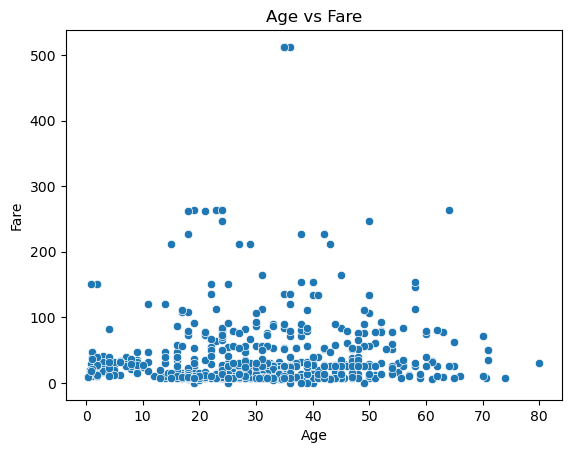

In [11]:
# 6. Explore the Inferential statistics on the given dataset.

# Import necessary libraries
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop missing values for simplicity
df.dropna(subset=['age', 'fare'], inplace=True)

# Explore the dataset
print(df.head())

# Step 1: Hypothesis Testing (t-test)
# H0: Mean age is same for males and females
# H1: Mean age is different for males and females

male_age = df[df['sex'] == 'male']['age']
female_age = df[df['sex'] == 'female']['age']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(male_age, female_age)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Step 2: Confidence Interval for 'fare' (95%)
mean_fare = np.mean(df['fare'])
std_fare = np.std(df['fare'], ddof=1)  # sample std deviation
n = len(df['fare'])

confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

margin_of_error = z_score * (std_fare / np.sqrt(n))
lower_bound = mean_fare - margin_of_error
upper_bound = mean_fare + margin_of_error

print("\nConfidence Interval for 'Fare':")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

# Step 3: Correlation Analysis between 'age' and 'fare'
correlation = df['age'].corr(df['fare'])
print("\nCorrelation between Age and Fare:")
print(f"Correlation Coefficient: {correlation:.2f}")

# Step 4: Visualization (Optional)
sns.scatterplot(x='age', y='fare', data=df)
plt.title("Age vs Fare")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_1808\2980383460.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["month"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str))


            passengers
month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


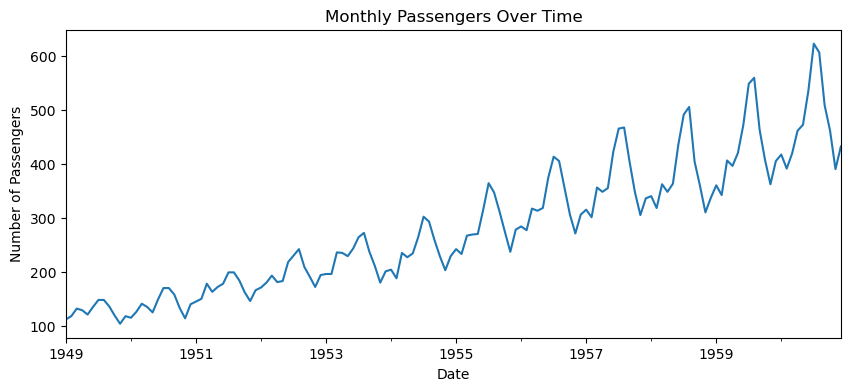


ADF Test Result:
ADF Statistic: 0.8153688792060597
P-value: 0.9918802434376411


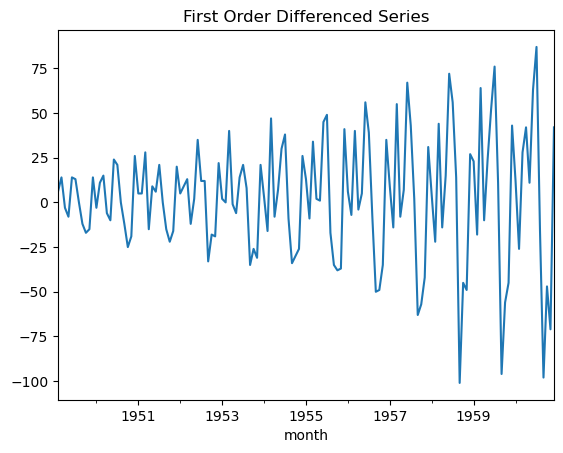

c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 16 Apr 2025   AIC                           1394.683
Time:                        23:23:04   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

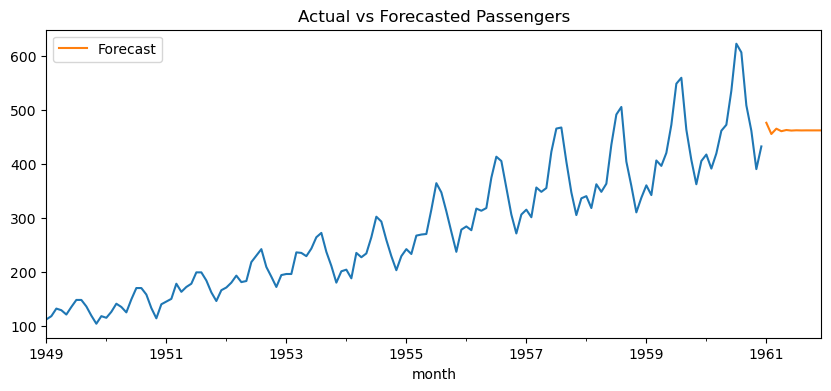

In [ ]:
# 7. Implement time series forecasting.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load built-in time series dataset
df = sns.load_dataset("flights")  # Monthly passengers data

# Convert 'year' and 'month' into datetime and set as index
df["month"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str))
df.set_index("month", inplace=True)
df.drop(columns=["year"], inplace=True)  # Drop redundant column

print(df.head())

# Step 1: Visualize the time series
df['passengers'].plot(figsize=(10, 4), title='Monthly Passengers Over Time')
plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.show()

# Step 2: Check for stationarity using Augmented Dickey-Fuller test
adf_result = adfuller(df['passengers'])
print("\nADF Test Result:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")

# Step 3: Differencing if not stationary
df['passengers_diff'] = df['passengers'].diff().dropna()
df['passengers_diff'].dropna().plot(title='First Order Differenced Series')
plt.show()

# Step 4: Fit ARIMA model (simple config: ARIMA(1,1,1))
model = ARIMA(df['passengers'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Step 5: Forecasting next 12 months
forecast = model_fit.forecast(steps=12)
print("\nForecast for next 12 months:")
print(forecast)

# Step 6: Plot actual vs forecast
df['passengers'].plot(label='Actual', figsize=(10, 4))
forecast.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast.plot(label='Forecast', legend=True)
plt.title("Actual vs Forecasted Passengers")
plt.show()

# pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

Average distances for each point to its k-nearest neighbors:
[0.5        0.5        0.5        0.5        0.5        0.5
 0.70710678 0.5        0.5        0.5        9.21954446]
Outliers detected (indices of outliers): [10]


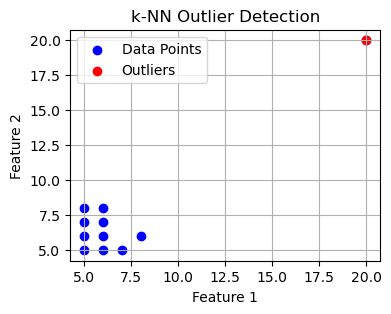

In [13]:
# EXP 8 : OUTLIER DETECTION


import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Example data points (with a potential outlier at [20, 20])
X = np.array([[5, 5], [6, 5], [5, 6], [6, 6], [5, 7], [7, 5], [8, 6], [5, 8], [6, 7], [6, 8], [20, 20]])

# Define number of neighbors (k)
k = 2

# Fit the k-NN model
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)

# Calculate distances and indices of k-nearest neighbors
distances, indices = neigh.kneighbors(X)

# Calculate average distance for each point to its k-nearest neighbors
avg_distances = np.mean(distances, axis=1)

# Print the average distances for debugging
print("Average distances for each point to its k-nearest neighbors:")
print(avg_distances)

# Set a threshold for outlier detection (e.g., 90th percentile of the average distance)
threshold = np.percentile(avg_distances, 90)  # Set to 90th percentile for better sensitivity

# Identify outliers based on the threshold
outliers = np.where(avg_distances > threshold)

# Print outliers detected
print("Outliers detected (indices of outliers):", outliers[0])

# Visualize the data points and outliers
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], label='Data Points', c='blue')
plt.scatter(X[outliers[0], 0], X[outliers[0], 1], color='red', label='Outliers')
plt.legend()
plt.title('k-NN Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Data Types:
 sepal length (cm)    float64
sepal width (cm)     float64


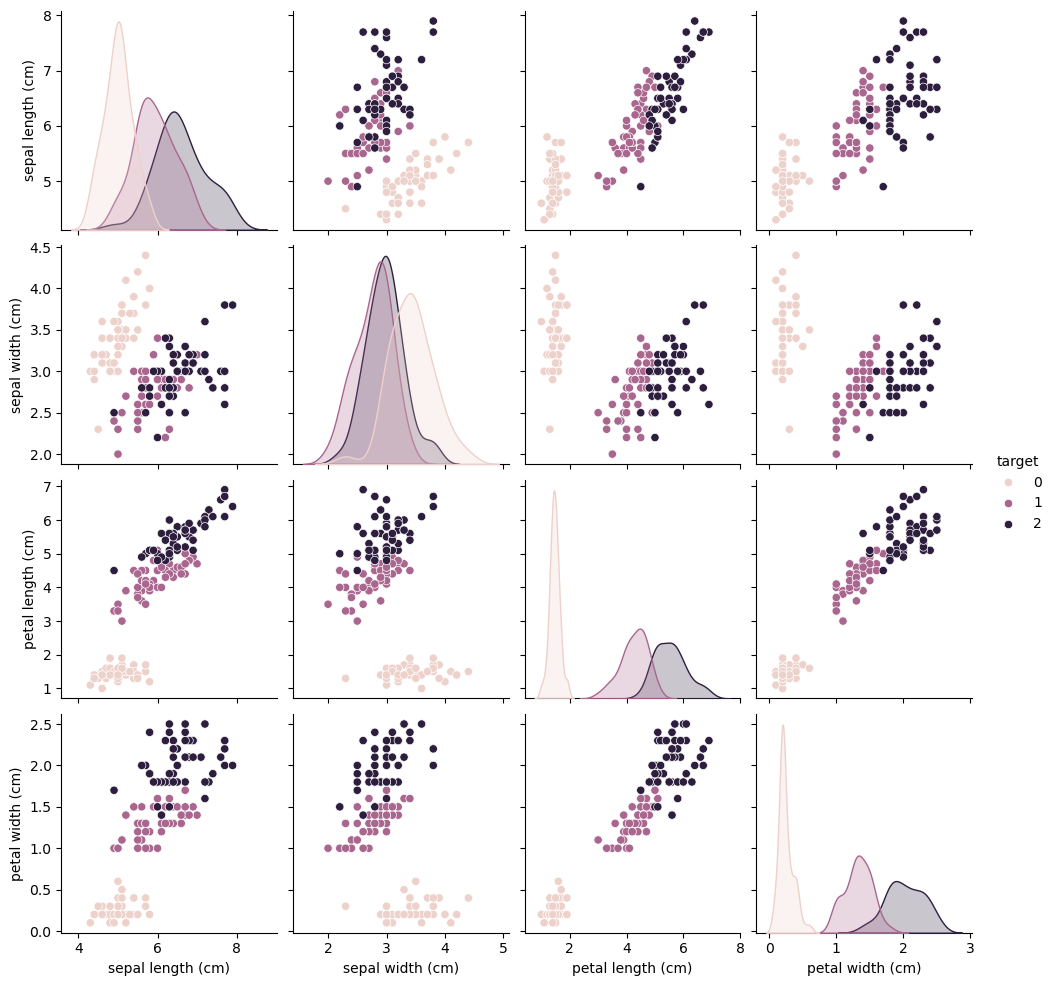


Model Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


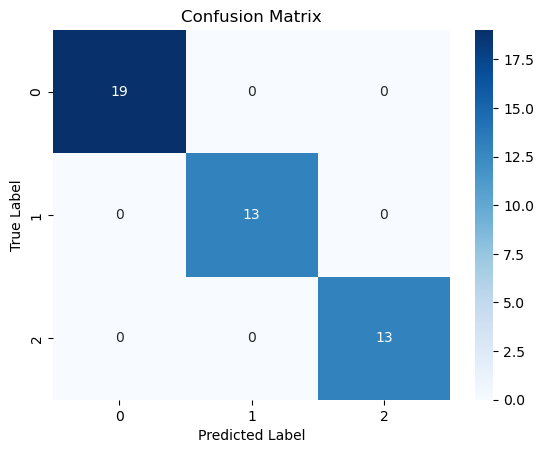

In [14]:
# 9. Study of Data Science tools and Programming languages

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Load dataset (Iris)
from sklearn.datasets import load_iris
data = load_iris()

# Step 3: Convert to DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Step 4: Perform basic data exploration
print(df.describe())  # Summary statistics
print("\nData Types:\n", df.dtypes)
print("\nNull Values:\n", df.isnull().sum())

# Step 5: Data visualization
sns.pairplot(df, hue='target')  # Pairplot to visualize relationships
plt.show()

# Step 6: Split data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Implement Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 9: Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Yaha kya dekh rahe ho
#### Exp 10 CASE STUDY he Nalayako